In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
uber_2014 = pd.concat([pd.read_csv(f"uber-raw-data-{month}14.csv") for month in ["apr", "may", "jun", "jul", "aug", "sep"]])


In [55]:
uber_2014['Base'].value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

In [ ]:
#USE LON AND LAT To determine geographic location to pull weather for

In [10]:
def verify_nyc_data(data):


    # NYC geographic bounds
    nyc_lat_min, nyc_lat_max = 40.5, 40.9
    nyc_lon_min, nyc_lon_max = -74.3, -73.7

    filtered_data = data[(data['Lat'] >= nyc_lat_min) & (data['Lat'] <= nyc_lat_max) &
                         (data['Lon'] >= nyc_lon_min) & (data['Lon'] <= nyc_lon_max)]

    # Calculate the percentage of data within bounds
    percentage_in_bounds = (len(filtered_data) / len(data)) * 100

    return f"Percentage of data within NYC bounds: {percentage_in_bounds:.2f}%"


In [11]:
print(verify_nyc_data(uber_2014))

Percentage of data within NYC bounds: 99.27%


In [56]:
uber_2014 = uber_2014.drop(columns=['Lat','Lon'])

In [57]:
uber_2014

,Date/Time,Base
0,4/1/2014 0:11:00,B02512
1,4/1/2014 0:17:00,B02512
2,4/1/2014 0:21:00,B02512
3,4/1/2014 0:28:00,B02512
4,4/1/2014 0:33:00,B02512
...,...,...
1028131,9/30/2014 22:57:00,B02764
1028132,9/30/2014 22:57:00,B02764
1028133,9/30/2014 22:58:00,B02764
1028134,9/30/2014 22:58:00,B02764


In [64]:
uber_2015 = pd.read_csv("uber-raw-data-janjune-15.csv")


In [65]:
uber_2015 = uber_2015.drop(columns='Affiliated_base_num')

In [66]:
uber_2015 = uber_2015.drop(columns='locationID')

In [67]:
uber_2015

,Dispatching_base_num,Pickup_date
0,B02617,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00
2,B02617,2015-05-17 09:47:00
3,B02617,2015-05-17 09:47:00
4,B02617,2015-05-17 09:47:00
...,...,...
14270474,B02765,2015-05-08 15:43:00
14270475,B02765,2015-05-08 15:43:00
14270476,B02765,2015-05-08 15:43:00
14270477,B02765,2015-05-08 15:44:00


In [68]:
uber_2015['Dispatching_base_num'].value_counts()

B02764    5753653
B02682    3484530
B02617    2068525
B02598    1526660
B02765    1152727
B02512     255772
B02835      26622
B02836       1990
Name: Dispatching_base_num, dtype: int64

In [14]:
#NYC BASE CODES
# Base Code	Base Name
# B02512	Unter
# B02598	Hinter
# B02617	Weiter
# B02682	Schmecken
# B02764	Danach-NY
# B02765	Grun
# B02835	Dreist
# B02836	Drinnen



In [58]:
#I WILL NOT COMBINE BOTH DF FROM 2014 and 2015
uber_2014['Date/Time'] = pd.to_datetime(uber_2014['Date/Time'])


In [69]:
uber_2015['Pickup_date'] = pd.to_datetime(uber_2015['Pickup_date'])

In [70]:


uber_2015 = uber_2015.rename(columns={'Pickup_date': 'datetime', 'Dispatching_base_num': 'base_num'})

In [60]:
uber_2014 = uber_2014.rename(columns={'Date/Time': 'datetime', 'Base': 'base_num'})

In [71]:
uber_2015

,base_num,datetime
0,B02617,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00
2,B02617,2015-05-17 09:47:00
3,B02617,2015-05-17 09:47:00
4,B02617,2015-05-17 09:47:00
...,...,...
14270474,B02765,2015-05-08 15:43:00
14270475,B02765,2015-05-08 15:43:00
14270476,B02765,2015-05-08 15:43:00
14270477,B02765,2015-05-08 15:44:00


In [72]:
uber_2014

,datetime,base_num
0,2014-04-01 00:11:00,B02512
1,2014-04-01 00:17:00,B02512
2,2014-04-01 00:21:00,B02512
3,2014-04-01 00:28:00,B02512
4,2014-04-01 00:33:00,B02512
...,...,...
1028131,2014-09-30 22:57:00,B02764
1028132,2014-09-30 22:57:00,B02764
1028133,2014-09-30 22:58:00,B02764
1028134,2014-09-30 22:58:00,B02764


In [74]:
#I WILL NOT ADD BOTH DF TOGETHER TO CREATE MY UBER RIDE DATASET

uber_2015 = uber_2015[uber_2014.columns]
uber_2015

,datetime,base_num
0,2015-05-17 09:47:00,B02617
1,2015-05-17 09:47:00,B02617
2,2015-05-17 09:47:00,B02617
3,2015-05-17 09:47:00,B02617
4,2015-05-17 09:47:00,B02617
...,...,...
14270474,2015-05-08 15:43:00,B02765
14270475,2015-05-08 15:43:00,B02765
14270476,2015-05-08 15:43:00,B02765
14270477,2015-05-08 15:44:00,B02765


In [75]:
uber_combined = pd.concat([uber_2014, uber_2015], ignore_index=True)

In [77]:
uber_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18804806 entries, 0 to 18804805
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   base_num  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 286.9+ MB


In [80]:
uber_combined ##UBER DATASET COMPLETE

,datetime,base_num
0,2014-04-01 00:11:00,B02512
1,2014-04-01 00:17:00,B02512
2,2014-04-01 00:21:00,B02512
3,2014-04-01 00:28:00,B02512
4,2014-04-01 00:33:00,B02512
...,...,...
18804801,2015-05-08 15:43:00,B02765
18804802,2015-05-08 15:43:00,B02765
18804803,2015-05-08 15:43:00,B02765
18804804,2015-05-08 15:44:00,B02765


In [120]:
uber_combined.to_csv('merged_uber_data.csv')

In [286]:
slim_uber_combined = uber_combined.drop(columns='base_num')

In [292]:
slim2_uber_combined = uber_combined.drop(columns='base_num')

In [294]:
slim2_uber_combined.loc[520058]

datetime   2014-04-26 21:21:00
Name: 520058, dtype: datetime64[ns]

In [305]:
#CONFIRM PIVOT PROPERLY COUNTED RIDES
rows_tt = slim_uber_combined[slim_uber_combined['datetime'] == '2015-06-30 23:55:00']
rows_tt

,datetime,ride_count
520058,2015-06-30 23:55:00,73


In [307]:
slim_uber_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520063 entries, 0 to 520062
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    520063 non-null  datetime64[ns]
 1   ride_count  520063 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 MB


In [308]:
slim_uber_combined.to_csv('uber_data_ride_count.csv')

In [252]:
#AFTER FURTHER ANALYSIS I WILL REMOVE DUPLICATE DATES AND CREATE A ride_count colunn

In [297]:
#ROUND TO MINUTE
slim_uber_combined['datetime'] = slim_uber_combined['datetime'].dt.round('min')

,datetime
0,2014-04-01 00:11:00
1,2014-04-01 00:17:00
2,2014-04-01 00:21:00
3,2014-04-01 00:28:00
4,2014-04-01 00:33:00
...,...
18804801,2015-05-08 15:43:00
18804802,2015-05-08 15:43:00
18804803,2015-05-08 15:43:00
18804804,2015-05-08 15:44:00


In [293]:
slim_uber_combined.loc[520058]

datetime      2015-06-30 23:55:00
ride_count                     73
Name: 520058, dtype: object

In [290]:
slim_uber_combined = slim_uber_combined.groupby('datetime').size().reset_index(name='ride_count')

In [291]:
slim_uber_combined

,datetime,ride_count
0,2014-04-01 00:00:00,3
1,2014-04-01 00:01:00,1
2,2014-04-01 00:02:00,3
3,2014-04-01 00:03:00,2
4,2014-04-01 00:04:00,1
...,...,...
520058,2015-06-30 23:55:00,73
520059,2015-06-30 23:56:00,56
520060,2015-06-30 23:57:00,61
520061,2015-06-30 23:58:00,68


In [ ]:
# I will now source the weather data from climate data from the National Centers for Environmental InformationLinks to an external site.

In [81]:
#I will first determine the range for dates that I need
min_date = uber_combined['datetime'].min()
max_date = uber_combined['datetime'].max()
print("Start date:", min_date)
print("End date:", max_date)

Start date: 2014-04-01 00:00:00
End date: 2015-06-30 23:59:00


In [215]:
weather_df = pd.read_csv("3676669.csv")


In [216]:
weather_df.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'DASF', 'MDPR', 'MDSF', 'PRCP',
       'PSUN', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'WT10', 'WT11'],
      dtype='object')

In [217]:
#weather_df = weather_df.dropna()
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27340 entries, 0 to 27339
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  27340 non-null  object 
 1   NAME     27340 non-null  object 
 2   DATE     27340 non-null  object 
 3   DAPR     404 non-null    float64
 4   DASF     0 non-null      float64
 5   MDPR     401 non-null    float64
 6   MDSF     0 non-null      float64
 7   PRCP     26862 non-null  float64
 8   PSUN     0 non-null      float64
 9   SNOW     16118 non-null  float64
 10  SNWD     5987 non-null   float64
 11  TAVG     1368 non-null   float64
 12  TMAX     5858 non-null   float64
 13  TMIN     5857 non-null   float64
 14  TOBS     1905 non-null   float64
 15  TSUN     0 non-null      float64
 16  WT01     1198 non-null   float64
 17  WT02     149 non-null    float64
 18  WT03     177 non-null    float64
 19  WT04     50 non-null     float64
 20  WT05     6 non-null      float64
 21  WT06     48 

In [218]:
weather_columns = ['DATE', 'PRCP', 'SNOW', 'TMAX','TMIN','TAVG']
weather_df = weather_df[weather_columns]

# Check for missing values in these columns
print(weather_df.isnull().sum())
print(weather_df.info())


DATE        0
PRCP      478
SNOW    11222
TMAX    21482
TMIN    21483
TAVG    25972
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27340 entries, 0 to 27339
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    27340 non-null  object 
 1   PRCP    26862 non-null  float64
 2   SNOW    16118 non-null  float64
 3   TMAX    5858 non-null   float64
 4   TMIN    5857 non-null   float64
 5   TAVG    1368 non-null   float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


In [219]:
#I will continue cleaning this dataset now

In [220]:
#NEED TO DETERMINE HOW TO DEAL WITH NULLS

In [221]:
###CONVERT TO DATETIME FROM OBJECT TYPE

In [222]:
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])


In [223]:
#STAY CONSISTENT WITH COL NAMES
weather_df = weather_df.rename(columns={'DATE': 'datetime'})

In [320]:
###NOW I WANT TO CHECK HOW WHAT MY DATE RANGE IS COMPARED TO BEFORE
#LETS TURN PREVIOUS INTO FUNCTION
def get_df_daterange(df):
  min_date = df['datetime'].min()
  max_date = df['datetime'].max()
  print("Start date:", min_date)
  print("End date:", max_date)

In [225]:
##HERE WE ARE TESTING THE isolated weather dataframe
get_df_daterange(weather_df)
weather_df
sorted_weather_df = weather_df.sort_values(by='datetime')
sorted_weather_df

Start date: 2014-04-01 00:00:00
End date: 2015-06-30 00:00:00


,datetime,PRCP,SNOW,TMAX,TMIN,TAVG
19838,2014-04-01,0.00,0.0,NaN,NaN,NaN
9407,2014-04-01,0.00,NaN,55.0,35.0,NaN
1629,2014-04-01,0.00,0.0,NaN,NaN,NaN
8961,2014-04-01,0.07,NaN,NaN,NaN,NaN
20266,2014-04-01,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
21956,2015-06-30,0.00,NaN,NaN,NaN,NaN
23190,2015-06-30,0.00,0.0,NaN,NaN,NaN
6255,2015-06-30,0.00,0.0,NaN,NaN,NaN
18475,2015-06-30,0.00,0.0,NaN,NaN,NaN


In [226]:
# Filter dataset to retain only rows where both TMAX and TMIN are available
filtered_weather_df = weather_df.dropna(subset=['TMAX', 'TMIN'])

# Count of entries after filtering
filtered_entries = len(filtered_weather_df)

# Calculate the proportion of data retained'
proportion_retained = filtered_entries / len(weather_df['TMAX']) * 100
proportion_retained

21.419166057059254

In [343]:
##HERE WE ARE TESTING THE FILTERED NULLS IN TEMP MAX AND MIN
get_df_daterange(filtered_weather_df)
filtered_weather_df
sorted_filtered_weather_df = filtered_weather_df.sort_values(by='datetime')
sorted_filtered_weather_df

Start date: 2014-04-01 00:00:00
End date: 2015-06-30 00:00:00


,datetime,PRCP,SNOW,TMAX,TMIN,TAVG
739,2014-04-01,0.00,0.0,60.0,39.0,NaN
3396,2014-04-01,0.00,0.0,59.0,39.0,46.0
19382,2014-04-01,0.00,0.0,57.0,37.0,46.0
4622,2014-04-01,0.00,NaN,57.0,34.0,NaN
6300,2014-04-01,0.00,NaN,54.0,36.0,NaN
...,...,...,...,...,...,...
19381,2015-06-30,0.01,NaN,80.0,61.0,NaN
1194,2015-06-30,0.04,0.0,82.0,68.0,NaN
6755,2015-06-30,0.00,0.0,77.0,62.0,NaN
18931,2015-06-30,0.00,NaN,85.0,64.0,NaN


In [230]:
def fill_snow(row):
    # Define winter months
    winter_months = [12, 1, 2]
    # Check if the month is not a winter month
    if row['datetime'].month not in winter_months:
        # If SNOW is NaN and it's not a winter month, set it to 0
        if pd.isna(row['SNOW']):
            row['SNOW'] = 0
    return row

In [231]:
weather_df = weather_df.apply(fill_snow, axis=1)

In [344]:
sorted_filtered_weather_df = sorted_filtered_weather_df.apply(fill_snow, axis=1)

In [345]:
sorted_filtered_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 739 to 25513
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5856 non-null   datetime64[ns]
 1   PRCP      5853 non-null   float64       
 2   SNOW      5377 non-null   float64       
 3   TMAX      5856 non-null   float64       
 4   TMIN      5856 non-null   float64       
 5   TAVG      1368 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 320.2 KB


In [346]:
sorted_filtered_weather_df

,datetime,PRCP,SNOW,TMAX,TMIN,TAVG
739,2014-04-01,0.00,0.0,60.0,39.0,NaN
3396,2014-04-01,0.00,0.0,59.0,39.0,46.0
19382,2014-04-01,0.00,0.0,57.0,37.0,46.0
4622,2014-04-01,0.00,0.0,57.0,34.0,NaN
6300,2014-04-01,0.00,0.0,54.0,36.0,NaN
...,...,...,...,...,...,...
19381,2015-06-30,0.01,0.0,80.0,61.0,NaN
1194,2015-06-30,0.04,0.0,82.0,68.0,NaN
6755,2015-06-30,0.00,0.0,77.0,62.0,NaN
18931,2015-06-30,0.00,0.0,85.0,64.0,NaN


In [342]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27340 entries, 0 to 27339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  27340 non-null  datetime64[ns]
 1   PRCP      26862 non-null  float64       
 2   SNOW      25647 non-null  float64       
 3   TMAX      5858 non-null   float64       
 4   TMIN      5857 non-null   float64       
 5   TAVG      1368 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.3 MB


In [233]:
weather_df

,datetime,PRCP,SNOW,TMAX,TMIN,TAVG
0,2014-06-26,1.05,0.0,NaN,NaN,NaN
1,2014-06-27,0.00,0.0,NaN,NaN,NaN
2,2014-06-28,0.00,0.0,NaN,NaN,NaN
3,2014-06-29,0.00,0.0,NaN,NaN,NaN
4,2014-06-30,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
27335,2015-06-26,0.00,0.0,NaN,NaN,NaN
27336,2015-06-27,0.01,0.0,NaN,NaN,NaN
27337,2015-06-28,1.23,0.0,NaN,NaN,NaN
27338,2015-06-29,0.05,0.0,NaN,NaN,NaN


In [347]:
#REMOVE NULL FOR WINTER MONTHS
sorted_filtered_weather_df = sorted_filtered_weather_df.dropna(subset=['SNOW'])

In [348]:
#REMOVE FEW PRECIPITATION NULL VALUES
#WE ONLY HAVE 3!
sorted_filtered_weather_df = sorted_filtered_weather_df.dropna(subset=['PRCP'])

In [349]:
sorted_filtered_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 739 to 25513
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  5374 non-null   datetime64[ns]
 1   PRCP      5374 non-null   float64       
 2   SNOW      5374 non-null   float64       
 3   TMAX      5374 non-null   float64       
 4   TMIN      5374 non-null   float64       
 5   TAVG      1368 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 293.9 KB


In [350]:
#DATASET IS NOW PREP, I WILL LEAVE SOME AVG NULL bc it is just aditional info not neccessary for initial analysis

#lets confirm range one last time

get_df_daterange(sorted_filtered_weather_df)

Start date: 2014-04-01 00:00:00
End date: 2015-06-30 00:00:00


In [351]:
sorted_filtered_weather_df

,datetime,PRCP,SNOW,TMAX,TMIN,TAVG
739,2014-04-01,0.00,0.0,60.0,39.0,NaN
3396,2014-04-01,0.00,0.0,59.0,39.0,46.0
19382,2014-04-01,0.00,0.0,57.0,37.0,46.0
4622,2014-04-01,0.00,0.0,57.0,34.0,NaN
6300,2014-04-01,0.00,0.0,54.0,36.0,NaN
...,...,...,...,...,...,...
19381,2015-06-30,0.01,0.0,80.0,61.0,NaN
1194,2015-06-30,0.04,0.0,82.0,68.0,NaN
6755,2015-06-30,0.00,0.0,77.0,62.0,NaN
18931,2015-06-30,0.00,0.0,85.0,64.0,NaN


In [352]:

sorted_filtered_weather_df.to_csv('clean_weather_data.csv')

In [353]:
#LOAD FILES FOR ANALYSYS
an_weather_data = pd.read_csv('clean_weather_data.csv')
an_uber_data = pd.read_csv('uber_data_ride_count.csv')

In [354]:
an_weather_data['datetime'] = pd.to_datetime(an_weather_data['datetime']).dt.date
an_uber_data['datetime'] = pd.to_datetime(an_uber_data['datetime']).dt.date

# Combine Uber data by day!!!
uber_daily = an_uber_data.groupby('datetime')['ride_count'].sum().reset_index()

In [355]:
get_df_daterange(uber_daily)

Start date: 2014-04-01
End date: 2015-06-30


In [356]:
#GET DATA ON ONE TABLE
merged_data = pd.merge(an_weather_data[['datetime', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'TAVG']], uber_daily, on='datetime', how='inner')


In [367]:
merged_data

,datetime,PRCP,SNOW,TMAX,TMIN,TAVG,ride_count
0,2014-04-01,0.00,0.0,60.0,39.0,NaN,14546
1,2014-04-01,0.00,0.0,59.0,39.0,46.0,14546
2,2014-04-01,0.00,0.0,57.0,37.0,46.0,14546
3,2014-04-01,0.00,0.0,57.0,34.0,NaN,14546
4,2014-04-01,0.00,0.0,54.0,36.0,NaN,14546
...,...,...,...,...,...,...,...
4360,2015-06-30,0.01,0.0,80.0,61.0,NaN,82627
4361,2015-06-30,0.04,0.0,82.0,68.0,NaN,82627
4362,2015-06-30,0.00,0.0,77.0,62.0,NaN,82627
4363,2015-06-30,0.00,0.0,85.0,64.0,NaN,82627


In [358]:
merged_data.to_csv('merged_uber_weather.csv')

In [379]:
merged_uber_weather = pd.read_csv('merged_uber_weather.csv')
merged_uber_weather['datetime'] = pd.to_datetime(merged_uber_weather['datetime'])

In [380]:
#CALCULATING AVERAGE for missing values
merged_uber_weather = merged_uber_weather.drop(columns='Unnamed: 0')

In [382]:
merged_uber_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    4365 non-null   datetime64[ns]
 1   PRCP        4365 non-null   float64       
 2   SNOW        4365 non-null   float64       
 3   TMAX        4365 non-null   float64       
 4   TMIN        4365 non-null   float64       
 5   TAVG        1092 non-null   float64       
 6   ride_count  4365 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 238.8 KB


In [383]:
# Calculate monthly averages for TAVG
monthly_avg_tavg = merged_uber_weather.groupby(merged_uber_weather['datetime'].dt.month)['TAVG'].transform('mean')


In [384]:
merged_uber_weather['TAVG'] = merged_uber_weather['TAVG'].fillna(monthly_avg_tavg)

In [408]:
merged_uber_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    4365 non-null   datetime64[ns]
 1   PRCP        4365 non-null   float64       
 2   SNOW        4365 non-null   float64       
 3   TMAX        4365 non-null   float64       
 4   TMIN        4365 non-null   float64       
 5   TAVG        4365 non-null   float64       
 6   ride_count  4365 non-null   int64         
 7   season      4365 non-null   object        
 8   month       4365 non-null   int64         
 9   year        4365 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 341.1+ KB


In [387]:
merged_uber_weather.to_csv('uber_weather.csv')

In [330]:
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [392]:
merged_uber_weather['season'] = pd.to_datetime(merged_uber_weather['datetime']).apply(get_season)
seasonal_averages = merged_uber_weather.groupby('season')['ride_count'].mean()

In [397]:
seasonal_averages

season
Autumn    34255.256477
Spring    55807.325676
Summer    42140.911499
Winter    71535.559322
Name: ride_count, dtype: float64

In [398]:
average_rides_by_season = merged_uber_weather.groupby('season')['ride_count'].mean().reset_index()

# Sort the results for better visualization
average_rides_by_season.sort_values(by='ride_count', ascending=False, inplace=True)

average_rides_by_season

,season,ride_count
3,Winter,71535.559322
1,Spring,55807.325676
2,Summer,42140.911499
0,Autumn,34255.256477


In [394]:
correlation_max_temp = merged_uber_weather['TMAX'].corr(merged_uber_weather['ride_count'])
print(f'Correlation coefficient between maximum temperature and ride count: {correlation_max_temp}')

correlation_min_temp = merged_uber_weather['TMIN'].corr(merged_uber_weather['ride_count'])
print(f'Correlation coefficient between minimum temperature and ride count: {correlation_min_temp}')


Correlation coefficient between maximum temperature and ride count: -0.33813227545870705
Correlation coefficient between minimum temperature and ride count: -0.3464933362704814


In [395]:
# Calculate correlation between temperature and ride count
correlation = merged_uber_weather[['TAVG', 'ride_count']].corr()

correlation

,TAVG,ride_count
TAVG,1.000000,-0.379874
ride_count,-0.379874,1.000000


Based on the TAVG ride_count correlation we can see it is a moderate negative correlation. Generally, as the temperature decreases, the number of Uber rides tends to increase, and vice versa.

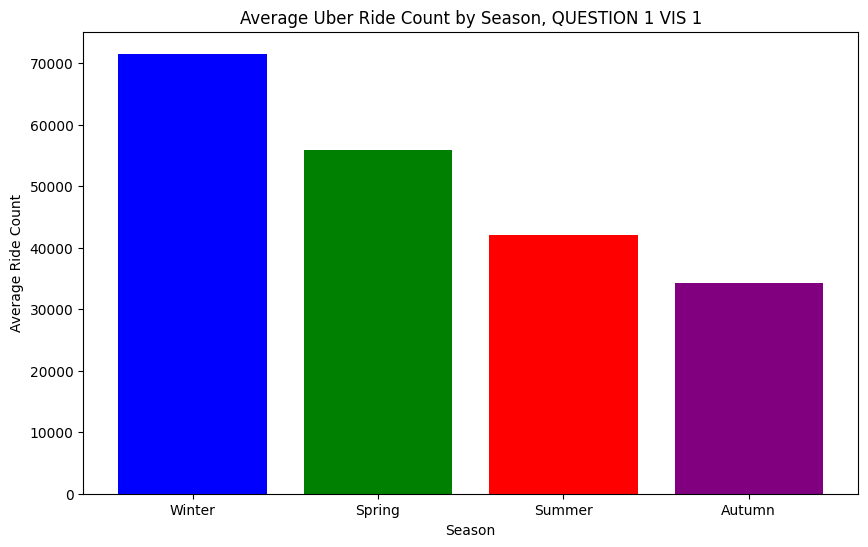

In [405]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_rides_by_season['season'], average_rides_by_season['ride_count'], color=['blue', 'green', 'red', 'purple'])
plt.title('Average Uber Ride Count by Season, QUESTION 1 VIS 1')
plt.xlabel('Season')
plt.ylabel('Average Ride Count')
plt.show()


In [402]:
data = merged_uber_weather
# Map months to seasons
month_to_season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
                   11: 'Autumn', 12: 'Winter'}

# Extract month and map to season
data['month'] = data['datetime'].dt.month
data['season'] = data['month'].apply(lambda x: month_to_season[x])

# Group by month and calculate average ride counts
monthly_averages = data.groupby('month').agg({'ride_count':'mean'}).reset_index()
monthly_averages['season'] = monthly_averages['month'].apply(lambda x: month_to_season[x])


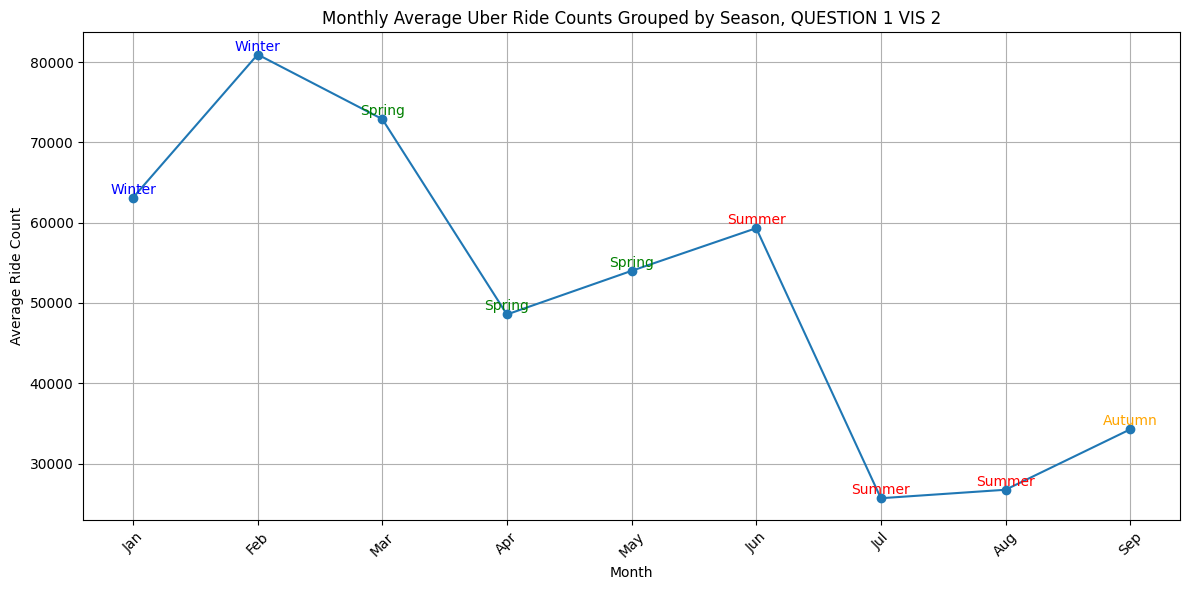

In [406]:
import matplotlib.pyplot as plt

# Set colors for each season
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Autumn': 'orange'}

plt.figure(figsize=(12, 6))
plt.plot(monthly_averages['month'], monthly_averages['ride_count'], marker='o', linestyle='-')

# Annotate each point with the season and use color coding
for i, row in monthly_averages.iterrows():
    plt.text(row['month'], row['ride_count'] + 500, f"{row['season']}", color=season_colors[row['season']], ha='center')  # Adjust position as needed

plt.title('Monthly Average Uber Ride Counts Grouped by Season, QUESTION 1 VIS 2')
plt.xlabel('Month')
plt.ylabel('Average Ride Count')

# Dynamically set x-ticks based on the months in the dataset
plt.xticks(monthly_averages['month'], labels=[calendar.month_abbr[i] for i in monthly_averages['month']], rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


**Question 1:**

Do people take more Uber rides during summer and winter months compared to other seasons?

**Response 1:**
Based on my analysis people in NYC take more ubers in the winter than in the warmer months. Here is the breakdown.

This seasonal analysis is crucial for Uber's resource planning and marketing strategies, potentially influencing surge pricing, driver availability, and promotional campaigns.
```
Average Uber Ride Counts by Season
Winter: 71,536 rides
Spring: 55,807 rides
Summer: 42,141 rides
Autumn: 34,255 rides
```
See 2 charts above

In [429]:
#QUESTION 2 START
data = pd.read_csv('uber_weather.csv')

# Display the first few rows of the dataframe and data types
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4365 non-null   int64  
 1   datetime    4365 non-null   object 
 2   PRCP        4365 non-null   float64
 3   SNOW        4365 non-null   float64
 4   TMAX        4365 non-null   float64
 5   TMIN        4365 non-null   float64
 6   TAVG        4365 non-null   float64
 7   ride_count  4365 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 272.9+ KB


(   Unnamed: 0    datetime  PRCP  SNOW  TMAX  TMIN       TAVG  ride_count
 0           0  2014-04-01   0.0   0.0  60.0  39.0  51.727778       14546
 1           1  2014-04-01   0.0   0.0  59.0  39.0  46.000000       14546
 2           2  2014-04-01   0.0   0.0  57.0  37.0  46.000000       14546
 3           3  2014-04-01   0.0   0.0  57.0  34.0  51.727778       14546
 4           4  2014-04-01   0.0   0.0  54.0  36.0  51.727778       14546,
 None)

In [430]:

data.drop(columns='Unnamed: 0', inplace=True)

data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values('datetime', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 0 to 4364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    4365 non-null   datetime64[ns]
 1   PRCP        4365 non-null   float64       
 2   SNOW        4365 non-null   float64       
 3   TMAX        4365 non-null   float64       
 4   TMIN        4365 non-null   float64       
 5   TAVG        4365 non-null   float64       
 6   ride_count  4365 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 272.8 KB


In [437]:
# Aggregate the data by date
daily_data = data.groupby('datetime').agg({
    'TAVG': 'mean',
    'ride_count': 'sum'
}).reset_index()

In [440]:
correlation_matrix = daily_data[['TAVG', 'ride_count']].corr()
correlation_matrix

,TAVG,ride_count
TAVG,1.000000,-0.160989
ride_count,-0.160989,1.000000


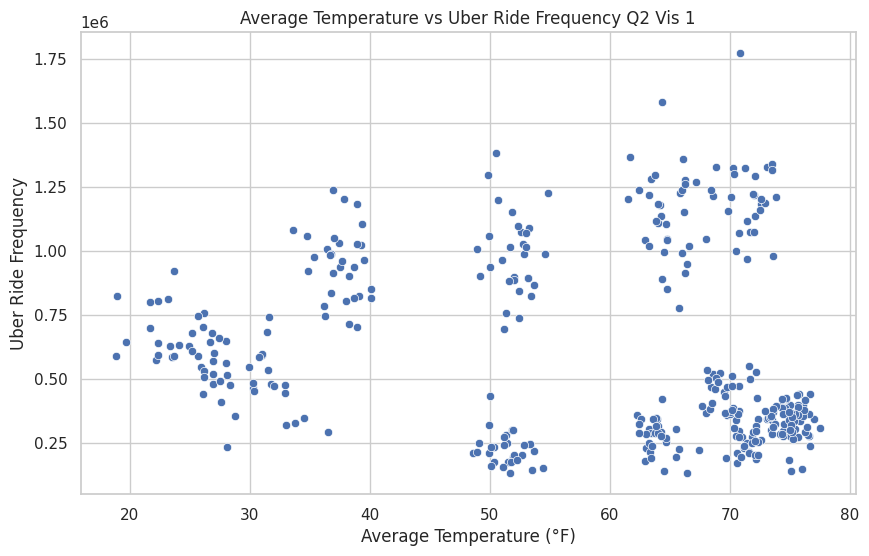

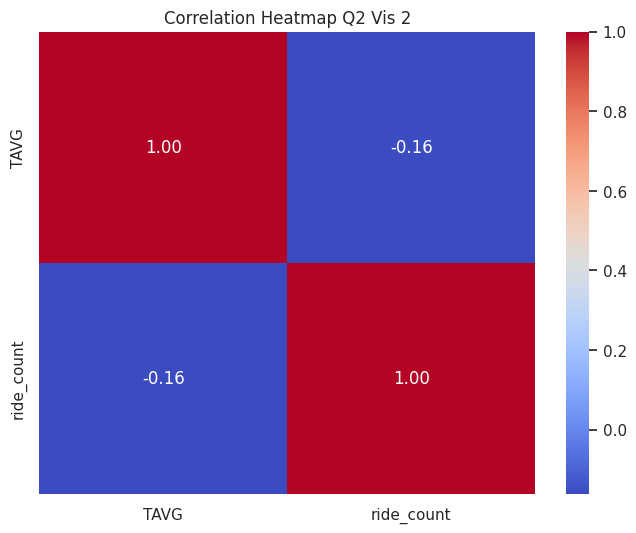

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Scatter Plot of Average Temperature vs. Uber Ride Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TAVG', y='ride_count', data=daily_data)
plt.title('Average Temperature vs Uber Ride Frequency Q2 Vis 1')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Uber Ride Frequency')
plt.grid(True)
plt.show()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Q2 Vis 2')
plt.show()


Question 2:

Is there a correlation between daily temperature and Uber ride frequency?

Response 2:

The distribution of points on the scatter plot can suggest a trend where higher temperatures correlate with a decrease in Uber rides. This continues to match the trend from the previous question where the warmer months had less rides

I added the second visualization to show once more a moderate negative correlation, meaning as temperature increases, Uber ride frequency tends to decrease.



See 2 charts above